$\LaTeX \text{ commands here}
\newcommand{\R}{\mathbb{R}}
\newcommand{\im}{\text{im}\,}
\newcommand{\norm}[1]{||#1||}
\newcommand{\inner}[1]{\langle #1 \rangle}
\newcommand{\span}{\mathrm{span}}
\newcommand{\proj}{\mathrm{proj}}
\newcommand{\OPT}{\mathrm{OPT}}
\newcommand{\vx}{\vec{x}}
\newcommand{\I}{\mathbb{I}}
$


<hr style="border: 5px solid black">

**Georgia Tech, CS 4540**

# Lecture 22: Clustering

Naveen Kodali and Jacob Abernethy

*Date:  Thursday, November 14, 2019*

## K-Means Clustering 

### K-Means Clustering: The standard view

The **K-Means** algorithm takes a simple, non-probabilistic approach.
- First, pick random cluster centers $\mu_k$.

Then, repeat until convergence:

<div style="margin:10px; padding: 10px; border: 2px solid black">
    
**E-Step:** Assign $x_j$ to the nearest cluster center $\mu_k$,
$$
z_j = \arg\min_k || x_j - \mu_k ||^2
$$

**M-Step:** Re-estimate cluster centers by averaging over assignments:
$$
\mu_k = \frac{1}{ \# \{ j \mid z_j =k \}} \sum_{j=1}^N x_j \mathbb{I}(z_j = k)
$$
</div>

### K-Means Clustering: Initialization

> Images taken from Bishop, **[PRML]**

<img src="images/kmeans-1.png">

### K-Means Clustering: E-Step

<img src="images/kmeans-2.png">

### K-Means Clustering: M-Step

<img src="images/kmeans-3.png">

### K-Means Clustering: E-Step

<img src="images/kmeans-4.png">

### K-Means Clustering: M-Step

<img src="images/kmeans-5.png">

### K-Means Clustering: E-Step

<img src="images/kmeans-6.png">

### K-Means Clustering: M-Step

<img src="images/kmeans-7.png">

### K-Means Clustering: E-Step

<img src="images/kmeans-8.png">

### K-Means Clustering: M-Step

<img src="images/kmeans-9.png">

### K-Means Clustering:  The "Optimization" View

*Exercise:* Show that the K-Means algorithm finds a local minimum of the **distortion measure**, given by
$$
J(\mu_1, \ldots, \mu_k; z_1, \ldots, z_N) = \sum_{j=1}^N \sum_{k=1}^K \mathbb{I}(z_j=k) || x_j - \mu_k ||^2
$$

## Exercise: Convince yourself that K-Means = Alternating Minimization

<div style="margin:10px; padding: 10px; border: 2px solid black">
    
**E-Step:**
$$
(z_1, \ldots, z_N) = \arg\min_{(z_1', \ldots, z_N')} J(\mu_1, \ldots, \mu_K; z_1', \ldots, z_N')
$$

**M-Step:**
$$
(\mu_1, \ldots, \mu_K) = \arg\min_{(\mu_1', \ldots, \mu_K')} J(\mu_1', \ldots, \mu_K'; z_1, \ldots, z_N)
$$

</div>

where
$$
J(\mu_1, \ldots, \mu_k; z_1, \ldots, z_N) = \sum_{j=1}^N \sum_{k=1}^K \mathbb{I}(z_j=k) || x_j - \mu_k ||^2
$$


## Clustering Graphs

What if we have a weighted graph $G = (V,E)$, with some weights $w_{ij} \; \forall (i,j) \in E$, and we want to cluster it into two groups $A, B \subset V$, where $A \cap B = \emptyset$ and $A \cup B = V$.

We can define $\text{cut}(A,B) := \sum_{(i,j) \in E, i\in A, j \in B} w_{ij}$.

**Problem**: We could try to find $A,B$ to minimize the cut value. Why might this be a bad idea?

## Better graph cutting

<img src="images/graphcut.png" width=30%/>

Define $|A| := \sum_{i \in A} \text{degree}(i)$.

The *Normalized Cut* of $A,B$ is
$$\text{Ncut}(A,B) := \text{cut}(A,B)\left(\frac 1 {|A|} + \frac 1 {|B|}\right)$$

New objective: want to find $A,B$ to minimize the $\text{Ncut}$! Problem: NP-hard to solve!

## Graph Laplacian

<img src="images/graphlaplacian.jpeg" width=50%>

#### Problem

Let $L$ be the graph laplacian for some graph $G$. Show that for any vector $f \in \mathbb{R}^{|V|}$ we have $f^\top L f = \sum_{(i,j) \in E} w_{ij} (f_i - f_j)^2$


## Graph Laplacian

<img src="images/graphlaplacian.jpeg" width=50%>

#### Problem

Let $L$ be the graph laplacian for some graph $G$.
1. Show that the eigenvalues of $L$ are all non-negative. 
2. How do we know that $L$ has a zero eigenvalue?
3. (Hard) What is the multiplicity of the 0 eigenvalue? What are corresponding eigenvectors?


## Cutting the graph via laplacian

Recall:
$$\text{Ncut}(A,B) := \text{cut}(A,B)\left(\frac 1 {|A|} + \frac 1 {|B|}\right)$$

#### Problem

Say we want to minimize $\text{Ncut}$. How can we formulate this in terms of a discrete vector optimization using the graph laplacian?

## Spectral clustering

In spectral clustering, we can *relax* this formulation as follows:
$$ \min_{ f \in \mathbb{R}^n } f^\top L f \quad \quad \text{ s.t. } f^\top \mathbb{1} = 0 \text{ and } \| f \| = \sqrt{n} $$

The solution of this problem is a vector $f$ with positive and negative entries. We threshold this vector at 0 to assign coordinates to $A$ and $B$.

#### Problem

Show that this can be reduced to find a certain eigenvector of $L$. Which eigenvector is it?


## Spectral clustering in practice

<img src="images/spectral_vs_kmeans.png">

## Let us try to implement K-means ourselves

First we'll load some data

In [1]:
# Setting up ---- dont worry about this part
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

# Importing the dataset  
data = pd.read_csv('xclara.csv')
print("Input Data and Shape")
print(data.shape)
data.head()

Input Data and Shape
(3000, 2)


V1         V2
0   2.072345  -3.241693
1  17.936710  15.784810
2   1.083576   7.319176
3  11.120670  14.406780
4  23.711550   2.557729

## What does this data look like?

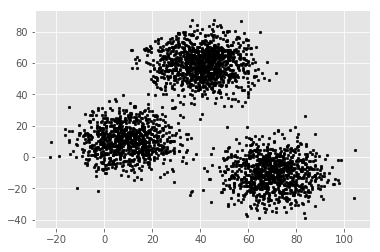

In [2]:
# Getting the values and plotting it ----- dont worry about this part
f1 = data['V1'].values
f2 = data['V2'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)

## First task: initialize the centroids

Pick some random points for the initial three centroids `C = [C[0,:], C[1,:], C[2,:]]`

In [ ]:
# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

# Number of clusters
k = 3
# Set X coordinates of random centroids and Y coordinates of random centroids
### TODO A: Implement this part to randomly initialize centroids ###
C_x = None
C_y = None
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print("Initial Centroids")
print(C)

# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

## Now implement the K-Means algorithm

You need to do two steps:
- (a) First implement the cluster assignments
- (b) 

In [ ]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        ### TODO B: Implement the clustering step or M-step ###
        clusters[i] = # this variable should be the rows of X for cluster i
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        ### TODO C: Implement the centroid computation step or E-step ###
    error = dist(C, C_old, None)

colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

In [6]:
## Solutions (please try out by yourself first):

#### TODO A:
## C_x = np.random.randint(0, np.max(X)-20, size=k)
## C_y = np.random.randint(0, np.max(X)-20, size=k)

#### TODO B:
## distances = dist(X[i], C)
## cluster = np.argmin(distances)
## clusters[i] = cluster

#### TODO C:
## points = [X[j] for j in range(len(X)) if clusters[j] == i]
## C[i] = np.mean(points, axis=0)

## CHALLENGE: Non-optimal K-means Solution

Can you augment the dataset given, and find an initialization of the K-Means algorithm, such that the final solution is *not* the best one?

It's not as easy as you think!
